# Kaggle

лучший скор: 0.85378

# Исследование

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных

In [ ]:
data = pd.read_csv('train.csv')

Посмотрим на данные (случайные строчки):

In [ ]:
data.sample(5)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
4991,61,99.40,5943.65,Male,0,Yes,No,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,Yes,No,Month-to-month,No,Bank transfer (automatic),0
116,1,75.35,75.35,Male,0,Yes,No,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Credit card (automatic),0
4936,66,79.85,5234.95,Male,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,No,Yes,Yes,Two year,No,Bank transfer (automatic),0
3144,1,70.70,70.7,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,0
1396,64,19.55,1240.15,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

Преобразуем TotalSpent в формат float

In [ ]:
data.TotalSpent = pd.to_numeric(data.TotalSpent, errors='coerce')

### Обработка пропущенных значений

Проверим, есть ли пропущенные значения

In [ ]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  9
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

Нужно заменить пропущенные значения в признаке TotalSpent

Заметим, что признак TotalSpent сильно коррелирует с произведением признаков MonthlySpending*ClientPeriod

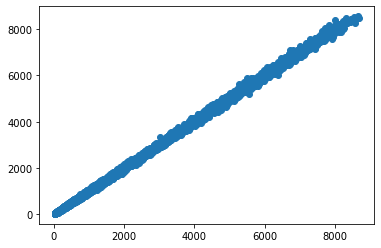

In [ ]:
plt.scatter(data.TotalSpent, data.MonthlySpending*data.ClientPeriod)

Коэффициент корреляции (рассчитан без пропущенных значений):

In [ ]:
cond = data.TotalSpent.notna()
np.corrcoef(data[cond].TotalSpent, data[cond].MonthlySpending*data[cond].ClientPeriod)

array([[1.        , 0.99955273],
       [0.99955273, 1.        ]])

Заменим пропущенные значения в признаке TotalSpend на MonthlySpending*ClientPeriod

In [ ]:
cond = data.TotalSpent.isna()
data.TotalSpent = data.TotalSpent.fillna(data[cond].MonthlySpending*data[cond].ClientPeriod)

Пропущенных значений больше нет

In [ ]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

### Списки с именами разных колонок

Числовые признаки

In [ ]:
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

Категориальные признаки

In [ ]:
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

In [ ]:
feature_cols = num_cols + cat_cols

Целевая переменная

In [ ]:
target_col = 'Churn'

## Анализ данных

### Гистограммы для числовых признаков

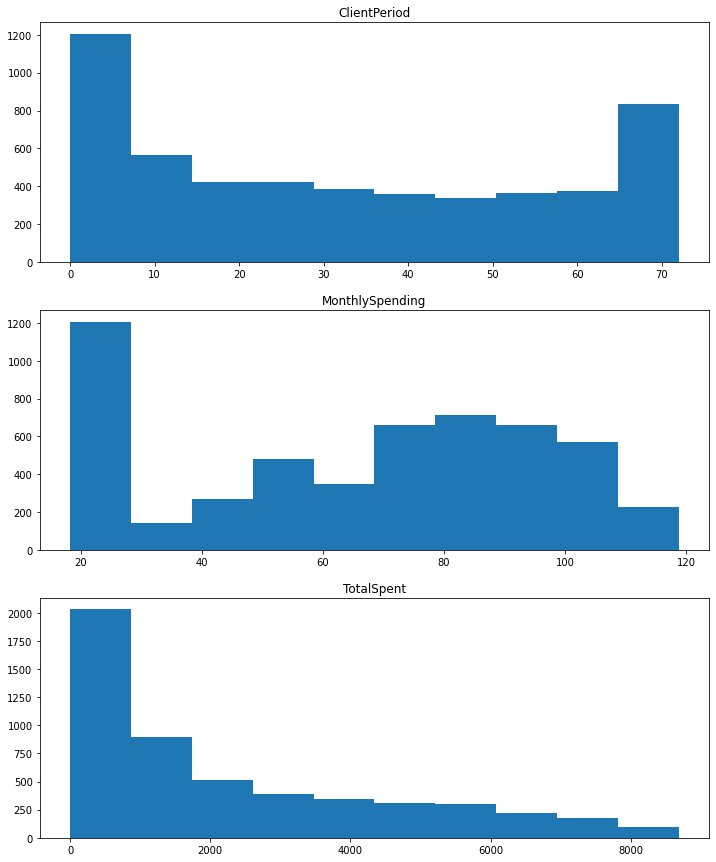

In [ ]:
fig, axs = plt.subplots(len(num_cols))

fig.set_size_inches(12, 15, forward=True)

for i, num_name in enumerate(num_cols):
  axs[i].hist(data[num_name])
  axs[i].set_title(num_name)
fig.show()

### Графики для категориальных признаков

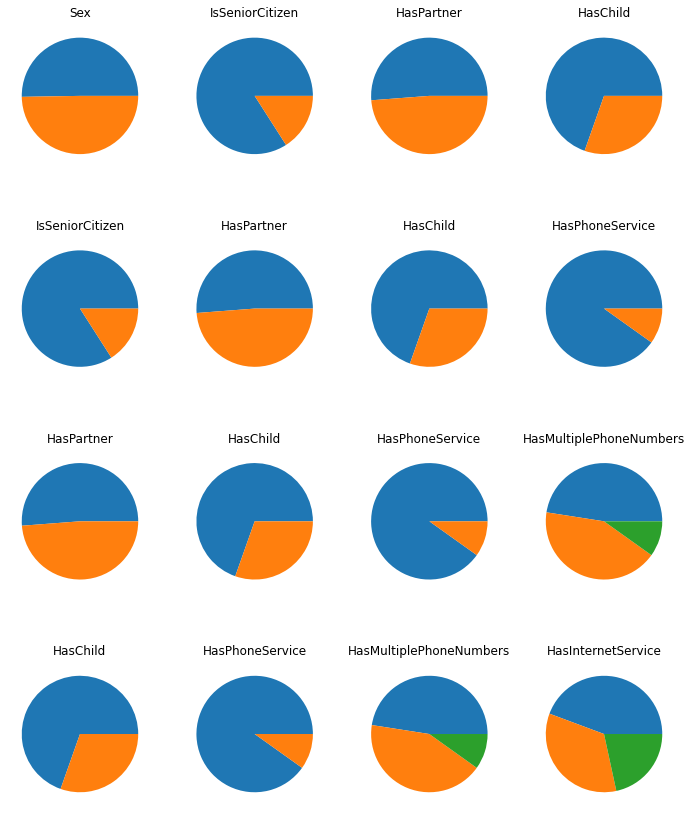

In [ ]:
n = 4
m = 4

fig, axs = plt.subplots(n, m)

fig.set_size_inches(12, 15, forward=True)

for i in range(n):
  for j in range(m):
    axs[i, j].pie(data[cat_cols[i+j]].value_counts())
    axs[i, j].set_title(cat_cols[i+j])


plt.show()

### Посмотрим на распределение целевой переменной
Классы несбалансированы

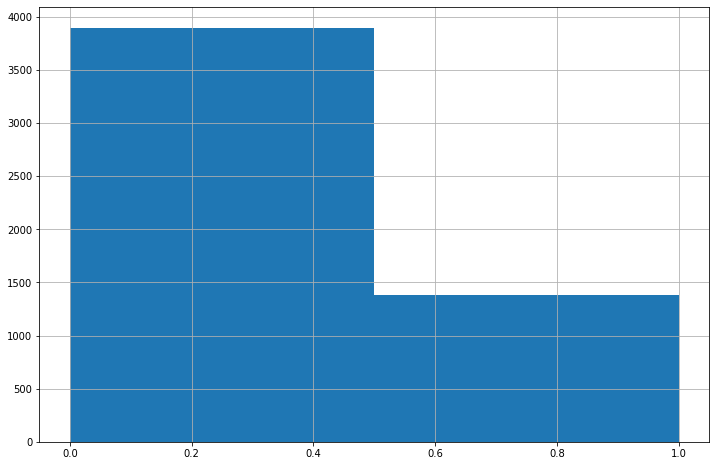

In [ ]:
data.Churn.hist(figsize=(12, 8),bins=2)

### Немного "игр" с разными библиотеками визуализации

С Pandas

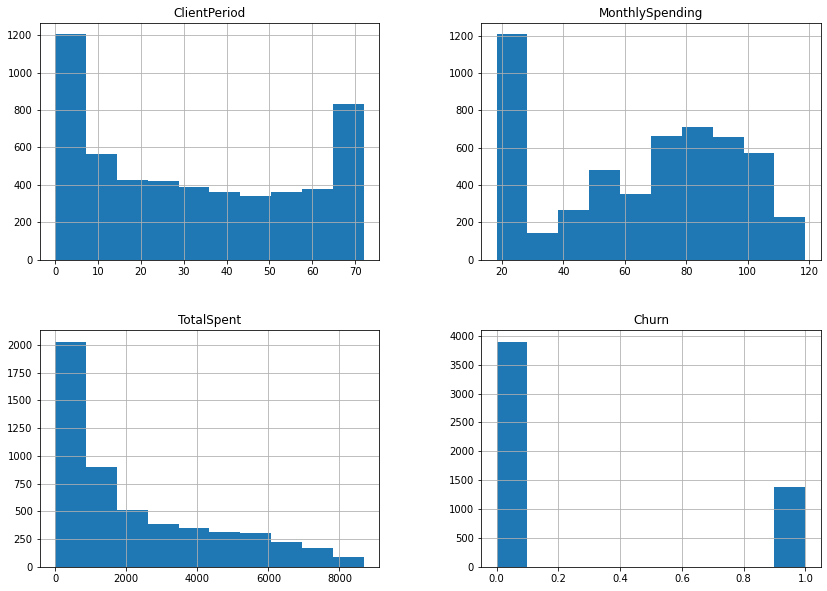

In [ ]:
data.hist(column=num_cols+[target_col], figsize=(14, 10))
None

С seaborn

In [ ]:
import seaborn as sns

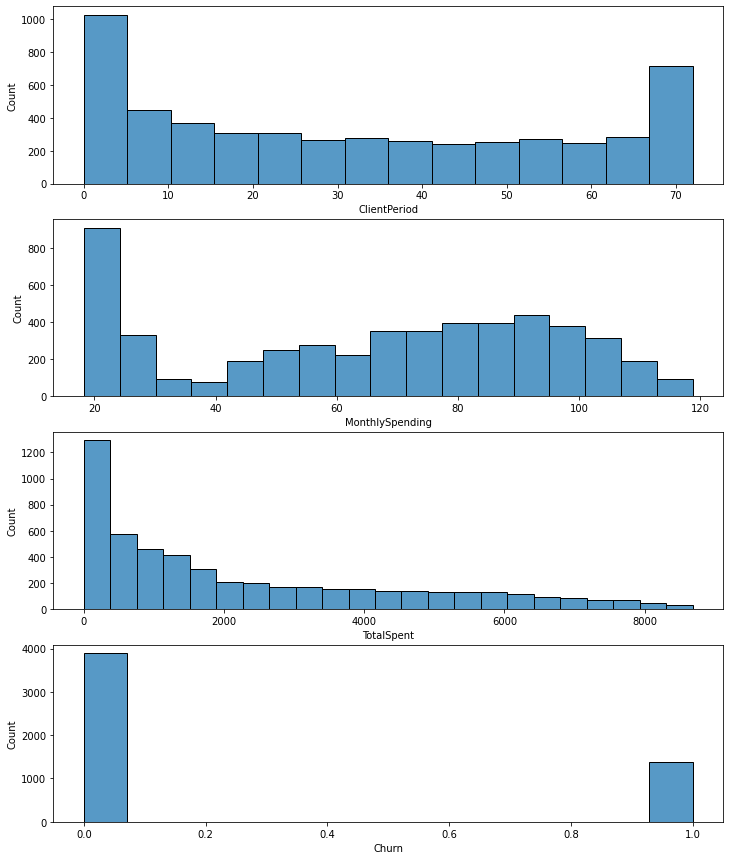

In [ ]:
cols = num_cols+[target_col]

fig, ax = plt.subplots(len(cols))

fig.set_size_inches(12, 15, forward=True)

for i, num_name in enumerate(cols):
  sns.histplot(data[num_name], ax=ax[i])
fig.show()

## Применение линейных моделей

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

### Обучение логистической регрессии и подбор лучших параметров, используя LogisticRegressionCV

#### Обработка данных

In [ ]:
X = data[feature_cols]

Нормировка числовых признаков

In [ ]:
scaler = StandardScaler()

X_num_scaled = pd.DataFrame(scaler.fit_transform(X[num_cols]))

one-hot-encoding категориальных признаков

In [ ]:
X_cat_dummy = pd.get_dummies(X[cat_cols], drop_first=True)

Объединение числовых и категориальных признаков

In [ ]:
X_train = pd.concat([X_num_scaled, X_cat_dummy], axis=1)

In [ ]:
y_train = data[target_col]

#### Побдберем лучший параметр C (кросс-валидация по тренировочной выборке)

Параметры обучения

In [ ]:
parameters = {'Cs': [100, 10, 1, 0.1, 0.01, 0.001], 
              'cv' : 5, 
              'scoring' : 'roc_auc', 
              'solver': 'sag', 'max_iter' : 1000, 
              'class_weight' : 'balanced', 
              'penalty' : 'l2', 
              'refit' : True}

In [ ]:
lgCV = LogisticRegressionCV(**parameters)

In [ ]:
lgCV.fit(X_train, y_train)

Лучший гиперпараметр C

In [ ]:
lgCV.C_

array([100.])

Лучшее качество

In [ ]:
lgCV.score(X_train, y_train)

0.8488637829685891

### Подбор параметров, используя GridSearchCV

В отличие от предыдущего способа, поиском по сетке можно подбирать не только гиперпараметр C, а, например, тип регуляризации.

In [ ]:
X = data[feature_cols]
y = data[target_col]

Закодируем категориальные признаки

In [ ]:
X_cat_dummy = pd.get_dummies(X[cat_cols], drop_first=True)
X = pd.concat([X[num_cols], X_cat_dummy], axis=1)

Пайплайн

In [ ]:
# Scaler будем обучать только на тренировочных folds

pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression()
)

Подбираемые параметры модели

In [ ]:
param_grid = {
    'logisticregression__C': [100, 10, 1, 0.1, 0.01, 0.001],
    'logisticregression__penalty': ['l1', 'l2']
}

In [ ]:
search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, n_jobs=-1, refit=True, scoring='roc_auc')
search.fit(X, y)

Лучшие параметры

In [ ]:
print(search.best_params_)

{'logisticregression__C': 100, 'logisticregression__penalty': 'l2'}


Лучшее качество

In [ ]:
search.best_score_

0.8451222820603009

## CatBoost

In [ ]:
!pip install catboost

In [ ]:
import catboost

#### Разделение выборки на train/valid и тестирования catboost cо стандартными параметрами

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(data[feature_cols], data[target_col], 
                                                       train_size=0.8, 
                                                       random_state=42)

In [ ]:
boosting_model_simple = catboost.CatBoostClassifier(cat_features=cat_cols)
boosting_model_simple.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import roc_auc_score

y_valid_predicted = boosting_model_simple.predict_proba(X_valid)[:, 1]

roc_auc_score(y_valid, y_valid_predicted)

0.823387759625419

#### Подбор лучшей комбинации параметров с помощью кросс-валидации на всех тренировочных данных

In [ ]:
# учтем несбалансированность классов
y_1 = len(data[data[target_col] == 1])/len(data[target_col])
y_0 = len(data[data[target_col] == 0])/len(data[target_col])

boosting_model = catboost.CatBoostClassifier(cat_features=cat_cols, 
                                             eval_metric='AUC:hints=skip_train~false',
                                             class_weights = [y_1, y_0])

In [ ]:
grid = {'learning_rate': [0.05, 0.1, 0.5],
        'n_estimators' : [200, 250, 300],
        'depth': [3, 4, 5, 6],
        'l2_leaf_reg': [100, 10, 1, 0.1, 0.01, 0.001]}

In [ ]:
grid_search_result = boosting_model.grid_search(grid, 
                                                X=data[feature_cols], 
                                                y=data[target_col], 
                                                cv=5,
                                                partition_random_seed=0,
                                                train_size=0.8,
                                                plot=True,
                                                refit=True)

Лучшие параметры

In [ ]:
for key in ['learning_rate', 'iterations', 'depth', 'l2_leaf_reg']:
    print(f"{key} : {boosting_model.get_param(key)}")

learning_rate : 0.1
iterations : 200
depth : 3
l2_leaf_reg : 0.001


Лучшее качество

In [ ]:
boosting_model.best_score_['learn']['AUC']

0.8746480891341937

# Предсказание

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
best_model = boosting_model

In [ ]:
X_test = pd.read_csv('test.csv')
submission = pd.read_csv('submission.csv', index_col=False)

In [ ]:
submission['Churn'] = best_model.predict_proba(X_test)[:,1]
submission.to_csv('./my_submission.csv', index=False)